In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

## 1. Generate Random Data

In [2]:
np.random.seed(500)
first_array = np.random.randint(1,10000, 512)
second_array = np.random.randint(1,10000, 1024)
third_array = np.random.randint(1,10000, 2048)
fourth_array = np.random.randint(1,10000, 4096)
fifth_array = np.random.randint(1,10000, 8192)

In [3]:
combined_arrays = np.array([first_array, second_array, third_array, fourth_array, fifth_array], dtype=object)

## 2. Create Sorting Algorithm

In [4]:
def insertion(array):
    for x in range(1, len(array)):
        item = array[x]
        y = x - 1
        while y >= 0 and array[y] > item:
            array[y + 1] = array[y]
            y -= 1
            array[y + 1] = item
    return array

In [5]:
sort_runtimes = []
for x in combined_arrays:
    start_time = time.time()
    insertion(x)
    runtime = time.time() - start_time
    sort_runtimes.append(runtime*1000)

In [6]:
sort_runtimes

[46.8440055847168,
 186.0039234161377,
 646.6419696807861,
 3183.9962005615234,
 11001.08003616333]

## 3. Create Binary Selection Algorithm

In [7]:
def Binary(list, item):
    high = len(list)-1
    low = 0
    while low <= high:
        mid = (low + high) // 2
        guess = list[mid]
        if guess == item:
            return mid
        if guess > item:
            high = mid - 1
        else:
            low = mid + 1
    return None

In [8]:
binary_runtimes = []
for x in combined_arrays:
    start_time = time.time()
    Binary(x, max(x))
    runtime = time.time() - start_time
    binary_runtimes.append(runtime*1000)

In [9]:
print(binary_runtimes)

[0.11515617370605469, 0.17499923706054688, 0.32520294189453125, 0.3299713134765625, 0.7772445678710938]


## 4. Create Linear Selection Algorithm and put Running Times onto Pandas DataFrame

In [10]:
def Linear(list, item):
    position = 0
    while True:
        guess = list[position]
        if guess == item:
            return position
        else:
            position = position + 1
    return None

In [11]:
linear_runtimes = []
for x in combined_arrays:
    start_time = time.time()
    Linear(x, max(x))
    runtime = time.time() - start_time
    linear_runtimes.append(runtime*1000)

In [12]:
print(linear_runtimes)

[0.41103363037109375, 1.024007797241211, 1.096963882446289, 1.377105712890625, 2.646923065185547]


In [13]:
sizes = []
for x in combined_arrays:
    size = len(x)
    sizes.append(size)

In [14]:
data = {'Sizes': sizes, 'Sort Time': sort_runtimes, 'Binary Time': binary_runtimes, 'Linear Time': linear_runtimes}
df = pd.DataFrame(data = data)
df['Binary + Sort'] = df['Binary Time']+ df['Sort Time']
df

,Sizes,Sort Time,Binary Time,Linear Time,Binary + Sort
0,512,46.844006,0.115156,0.411034,46.959162
1,1024,186.003923,0.174999,1.024008,186.178923
2,2048,646.641970,0.325203,1.096964,646.967173
3,4096,3183.996201,0.329971,1.377106,3184.326172
4,8192,11001.080036,0.777245,2.646923,11001.857281


## 5. Plot the runtimes for Binary Selection and Linear Selection Algorithms

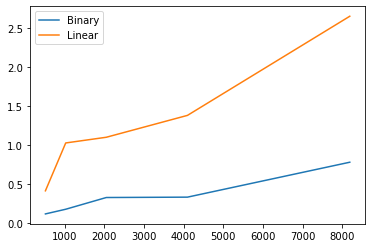

In [15]:
plt.plot(df['Sizes'], df['Binary Time'], label = 'Binary');
plt.plot(df['Sizes'], df['Linear Time'], label = 'Linear');
plt.legend()

### The graph clearly indicates that all the way around the binary algorithm performs the best in comparison to the linear selection algorithm. While this graph is only in milliseconds, the differences between the two selection algorithms continue to grow as the size of the arrays increase. This is due to the binary algorithm needing less "steps" in order to find the maximum position in comparison to the linear selection which mostly continues to grow. It is also quite noticable that the binary selection algorithm runtimes seem to move like a logarithmic curve as the size of the arrays grow.

## 6. Plot all runtimes

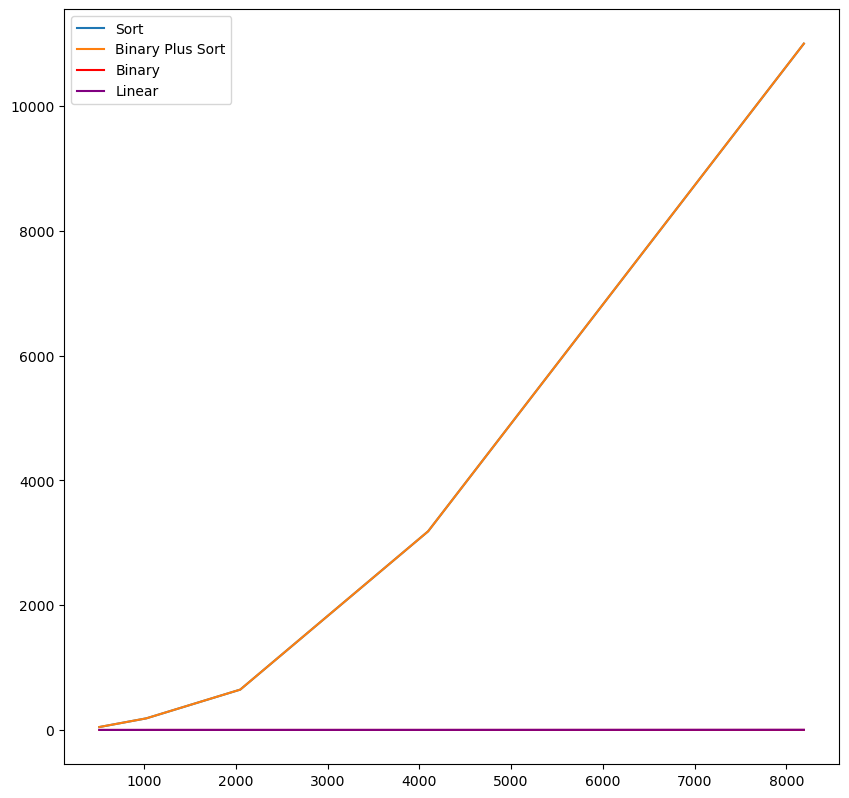

In [16]:
plt.figure(figsize=(10, 10), dpi=100)
plt.plot(df['Sizes'], df['Sort Time'], label = 'Sort');
plt.plot(df['Sizes'], df['Binary + Sort'], label = 'Binary Plus Sort')
plt.plot(df['Sizes'], df['Binary Time'], color = 'red', label = 'Binary');
plt.plot(df['Sizes'], df['Linear Time'], color = 'purple', label = 'Linear');
plt.legend()

### The results indicate a barely noticable difference between the runtimes involving the sorting algorithm and the runtimes involving only the selection algorithms. In fact, the sorting algorithms are so different in milliseconds that they tower over the times of both selection algorithms. This shows that the time it takes for an algorithm to sort arrays could be a massive difference maker when compared to selection algorithms. Furthermore, when it comes to the differences in scale, sorting algorithms are so large that it is difficult to get a read on the selection algorithms. Below I decided to scale down the y axis using the log functions. This helped me get a better read on the selection algorithms when compared to the sorting algorithms although it didn't help me separate the sorting runtime from the sort plus binary runtime much.

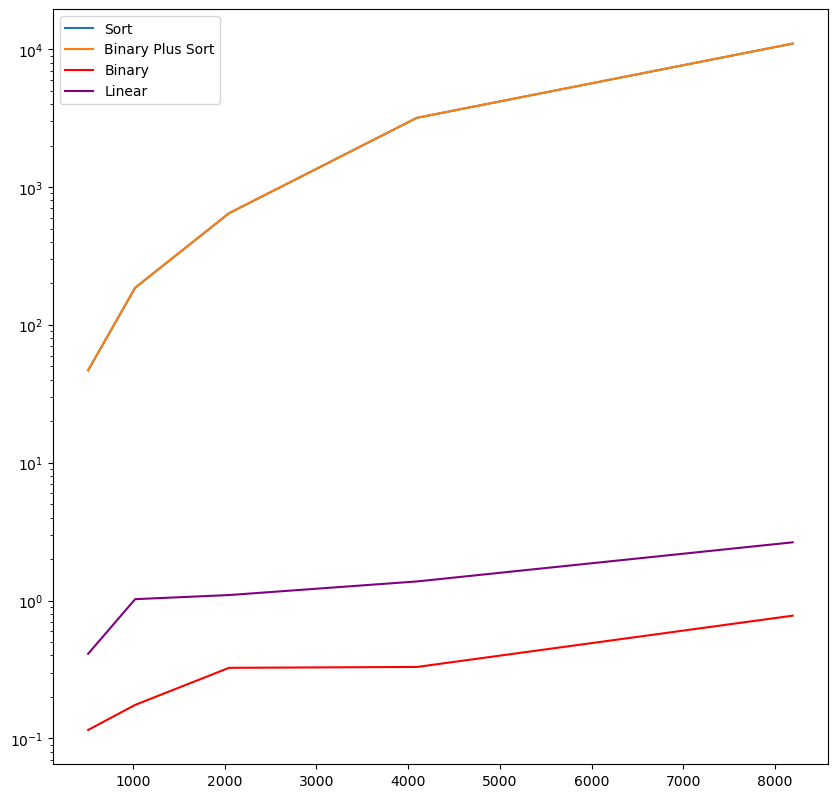

In [17]:
plt.figure(figsize=(10, 10), dpi=100)
plt.plot(df['Sizes'], df['Sort Time'], label = 'Sort');
plt.plot(df['Sizes'], df['Binary + Sort'], label = 'Binary Plus Sort')
plt.plot(df['Sizes'], df['Binary Time'], color = 'red', label = 'Binary');
plt.plot(df['Sizes'], df['Linear Time'], color = 'purple', label = 'Linear');
plt.yscale('log')
plt.legend()

# Executive Summary

## The data I put together came from 5 random arrays that produced uniformly distributed numbers between 1 and 10000. Each of these arrays were given the size 512, 1024, 2048, 4096, 8192. The goal was to create a sorting algorithm (which in this instance I chose the Insertion algorithm) and compare the binary selection algorithm with the linear selection algorithm in terms of runtimes. 

## When looking at the results of this endeavor it is clear that runtimes are not a straight line. While theoretically the Big O notation of the linear selection algorithm is O(n) it is not quite clear when the runtime should increase when compared to the size of my array. Case in point, the runtime the algorithm performed did not change significantly between the 1024 and 4096. It took until the array size doubled to 8192 for a significant change to be made in milliseconds. However, I imagine that if I zoomed out  and added more sizes the Big O notation for linear selection would move into its worse-case scenario of growing in a more linear fashion. The same goes for the Binary selection algorithm. The first three sizes failed to even produce number in milliseconds but eventually it conformed to a more logarithmic curve.

## Looking at the sorting algorithm, the selection algorithms look very small. However, what is fascinating is that the sorting runtimes, despite their larger scale, are conforming to the Big O notation of about O(n^2). This shows the strength of such notations. Essentially, it means that no matter how large the scale of data is, the notations will work to function approximately how effective the algorithms can be.